In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load dataset
df=pd.read_csv('IRIS.csv')

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#describe dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# checking for null values


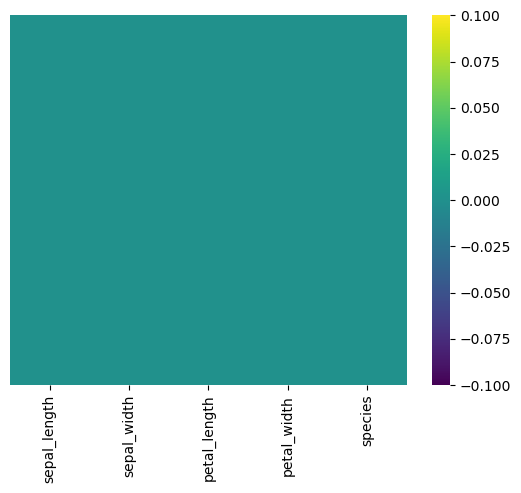

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Observation: In given dataset there are no null values are present

In [14]:
#checking unique values of columns
for i in df.columns:
    print('---------',i,'---------')
    print(df[i].unique())
    print('-----------------------')

--------- sepal_length ---------
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
-----------------------
--------- sepal_width ---------
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
-----------------------
--------- petal_length ---------
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
-----------------------
--------- petal_width ---------
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
-----------------------
--------- species ---------
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
-----------------------


# checking for outliers

In [15]:
numcol=df.select_dtypes(["int64","float64"]).columns
catcol=df.select_dtypes(["object"]).columns

In [16]:
numcol

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [17]:
catcol

Index(['species'], dtype='object')

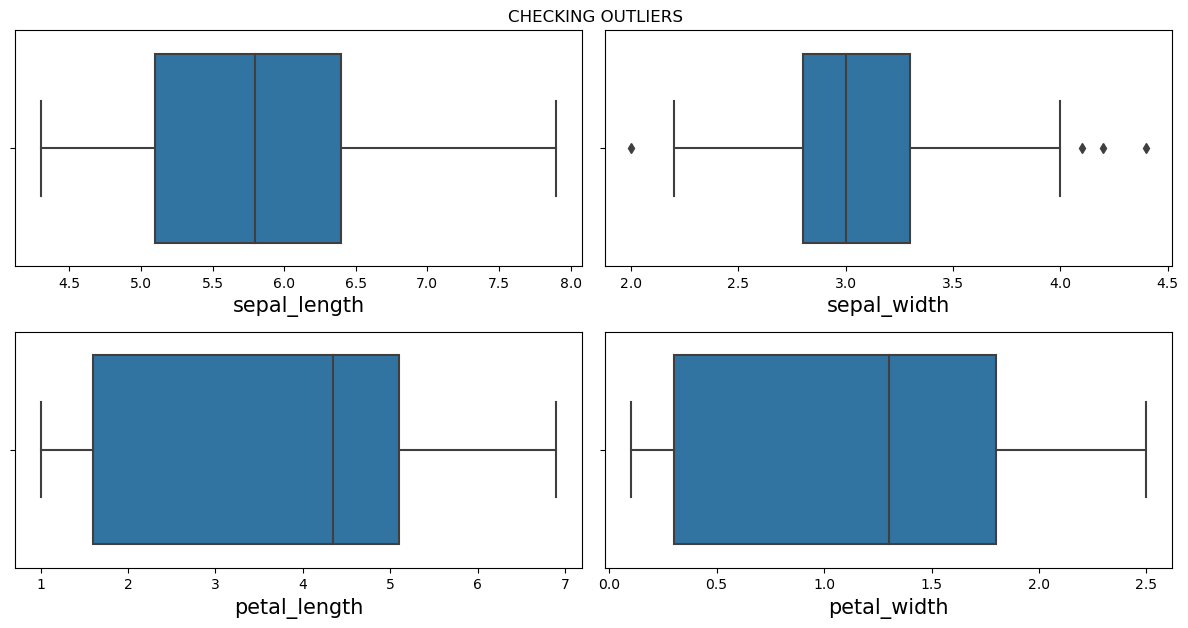

In [18]:
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING OUTLIERS")
pltn=1
for i in numcol:
 if pltn<=8:
  ax=plt.subplot(4,2,pltn)
  sns.boxplot(df[i])
  plt.xlabel(i,fontsize=15)
  pltn=pltn+1
plt.tight_layout()

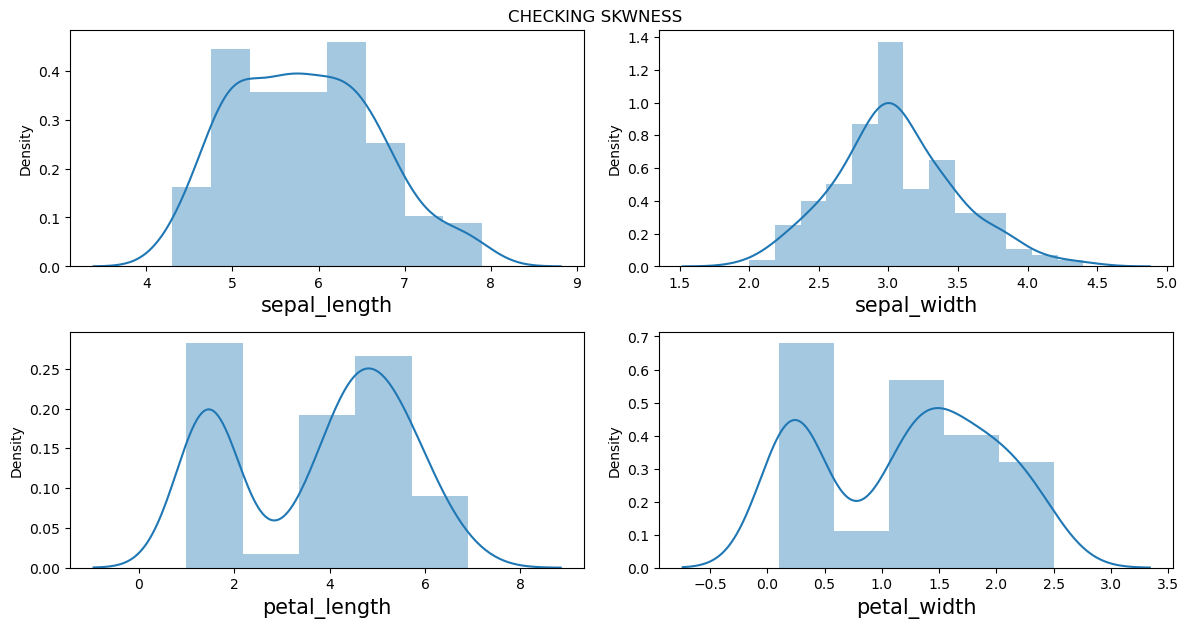

In [21]:
# checking for sckewness
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING SKWNESS")
pltn=1
for i in numcol:
 if pltn<=8:
   ax=plt.subplot(4,2,pltn)
   sns.distplot(df[i])
   plt.xlabel(i,fontsize=15)
   pltn=pltn+1
plt.tight_layout()

Observation: In given dataset there are outliers are present in column sepal_width so remove it

In [19]:
q1,q3=np.percentile(df['sepal_width'],[25,75])
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(4.05, 2.05)

In [20]:
def impute_outlier(value):
    if value>ul:
        return a
    elif value<ll:
        return a
    else:
        return value

In [22]:
a=(df['sepal_width'].mean())
df['sepal_width']=df['sepal_width'].apply(impute_outlier)

<AxesSubplot:xlabel='sepal_width'>

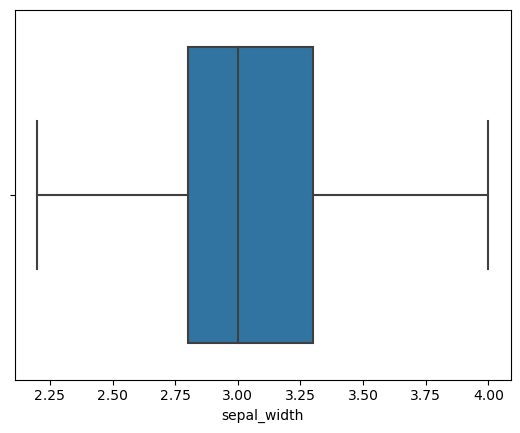

In [23]:
sns.boxplot(df['sepal_width'])

# Converting Categorical Features

In [27]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
df['species']=df['species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [31]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


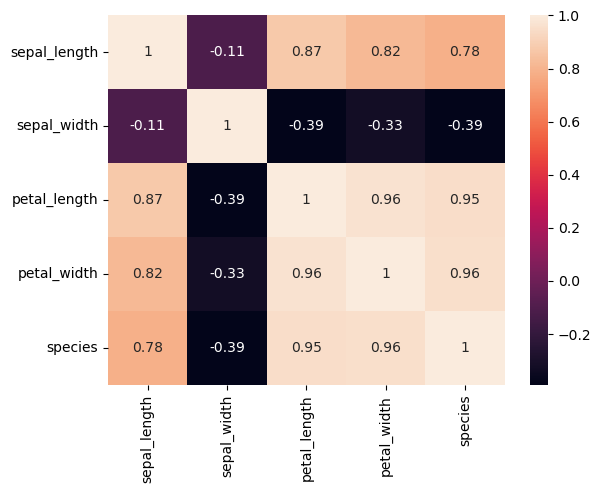

In [34]:
# checking correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


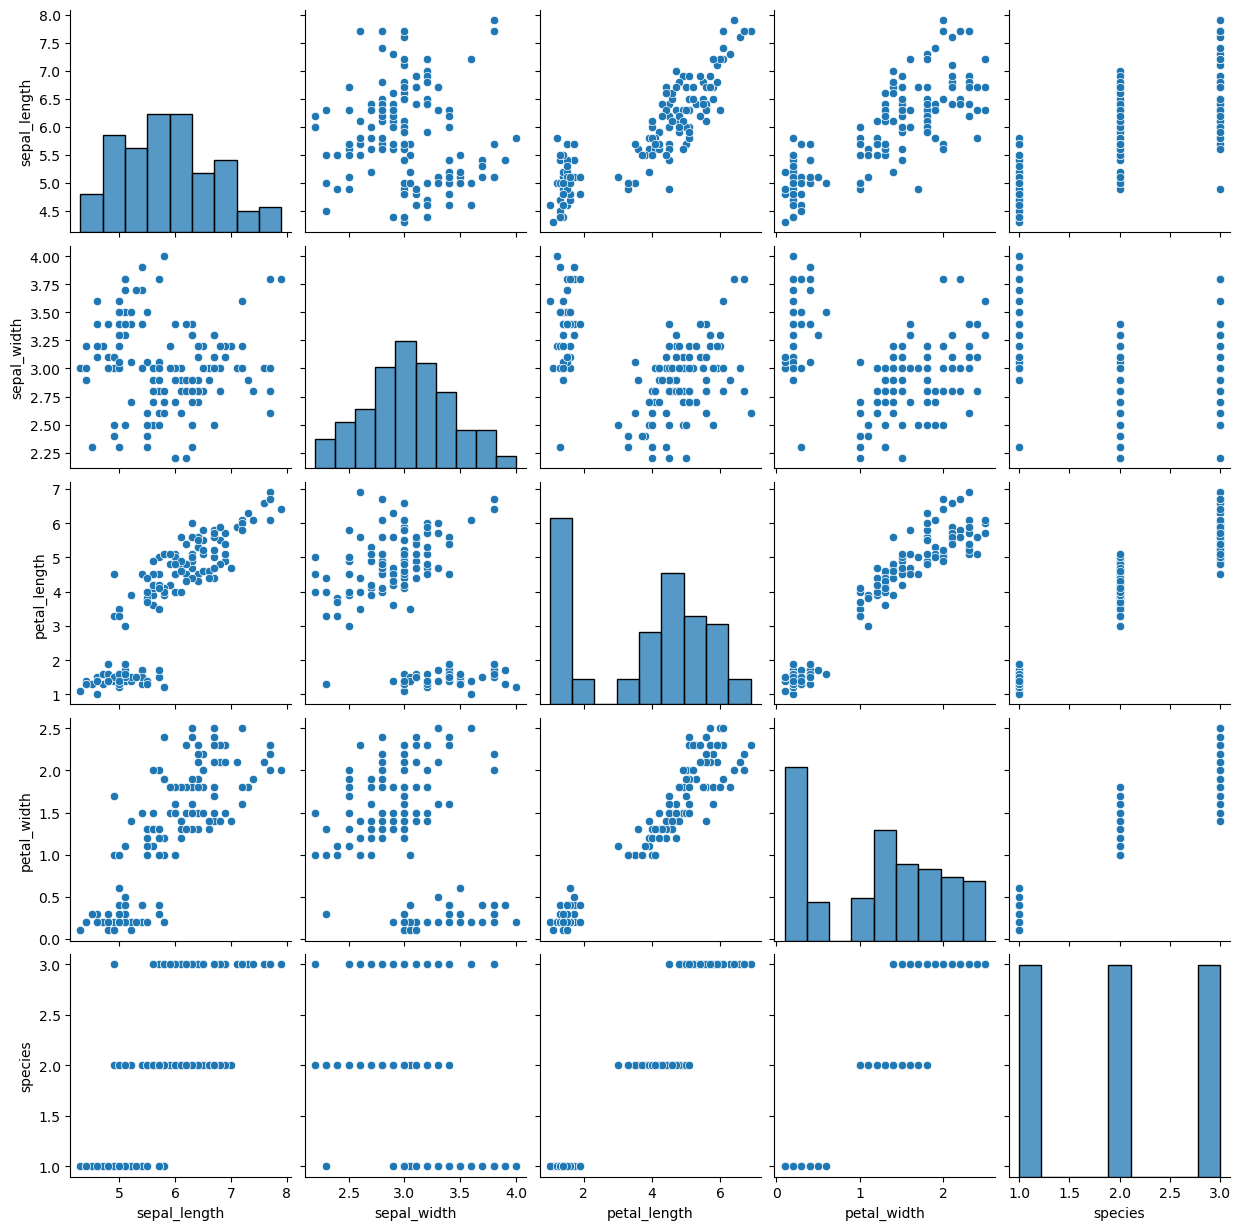

In [32]:
sns.pairplot(df)
plt.show()

In [36]:
 # splittig data into dependent and independant data
x=df.drop(['species'],axis=1).values
y=df['species'].values

In [37]:
x

array([[5.1  , 3.5  , 1.4  , 0.2  ],
       [4.9  , 3.   , 1.4  , 0.2  ],
       [4.7  , 3.2  , 1.3  , 0.2  ],
       [4.6  , 3.1  , 1.5  , 0.2  ],
       [5.   , 3.6  , 1.4  , 0.2  ],
       [5.4  , 3.9  , 1.7  , 0.4  ],
       [4.6  , 3.4  , 1.4  , 0.3  ],
       [5.   , 3.4  , 1.5  , 0.2  ],
       [4.4  , 2.9  , 1.4  , 0.2  ],
       [4.9  , 3.1  , 1.5  , 0.1  ],
       [5.4  , 3.7  , 1.5  , 0.2  ],
       [4.8  , 3.4  , 1.6  , 0.2  ],
       [4.8  , 3.   , 1.4  , 0.1  ],
       [4.3  , 3.   , 1.1  , 0.1  ],
       [5.8  , 4.   , 1.2  , 0.2  ],
       [5.7  , 3.054, 1.5  , 0.4  ],
       [5.4  , 3.9  , 1.3  , 0.4  ],
       [5.1  , 3.5  , 1.4  , 0.3  ],
       [5.7  , 3.8  , 1.7  , 0.3  ],
       [5.1  , 3.8  , 1.5  , 0.3  ],
       [5.4  , 3.4  , 1.7  , 0.2  ],
       [5.1  , 3.7  , 1.5  , 0.4  ],
       [4.6  , 3.6  , 1.   , 0.2  ],
       [5.1  , 3.3  , 1.7  , 0.5  ],
       [4.8  , 3.4  , 1.9  , 0.2  ],
       [5.   , 3.   , 1.6  , 0.2  ],
       [5.   , 3.4  , 1.6  , 0.4  ],
 

In [38]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

# Building a model

In [39]:
 #splitting data into test ad train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [41]:
x_test

array([[6.1  , 2.8  , 4.7  , 1.2  ],
       [5.7  , 3.8  , 1.7  , 0.3  ],
       [7.7  , 2.6  , 6.9  , 2.3  ],
       [6.   , 2.9  , 4.5  , 1.5  ],
       [6.8  , 2.8  , 4.8  , 1.4  ],
       [5.4  , 3.4  , 1.5  , 0.4  ],
       [5.6  , 2.9  , 3.6  , 1.3  ],
       [6.9  , 3.1  , 5.1  , 2.3  ],
       [6.2  , 2.2  , 4.5  , 1.5  ],
       [5.8  , 2.7  , 3.9  , 1.2  ],
       [6.5  , 3.2  , 5.1  , 2.   ],
       [4.8  , 3.   , 1.4  , 0.1  ],
       [5.5  , 3.5  , 1.3  , 0.2  ],
       [4.9  , 3.1  , 1.5  , 0.1  ],
       [5.1  , 3.8  , 1.5  , 0.3  ],
       [6.3  , 3.3  , 4.7  , 1.6  ],
       [6.5  , 3.   , 5.8  , 2.2  ],
       [5.6  , 2.5  , 3.9  , 1.1  ],
       [5.7  , 2.8  , 4.5  , 1.3  ],
       [6.4  , 2.8  , 5.6  , 2.2  ],
       [4.7  , 3.2  , 1.6  , 0.2  ],
       [6.1  , 3.   , 4.9  , 1.8  ],
       [5.   , 3.4  , 1.6  , 0.4  ],
       [6.4  , 2.8  , 5.6  , 2.1  ],
       [7.9  , 3.8  , 6.4  , 2.   ],
       [6.7  , 3.   , 5.2  , 2.3  ],
       [6.7  , 2.5  , 5.8  , 1.8  ],
 

In [42]:
y_test

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
       1], dtype=int64)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [49]:
def model(model):
 
 model.fit(x_train,y_train)
 y_pred=model.predict(x_test)
 train=model.score(x_train,y_train)
 test=model.score(x_test,y_test)
 print(f"Training score:{train}\nTesting score:{test}")
 print(classification_report(y_test,y_pred))
 return model

In [50]:
#LogisticRegression
log=model(LogisticRegression())

Training score:0.9619047619047619
Testing score:1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [51]:
#KNeighborsClassifier
knn=model(KNeighborsClassifier())

Training score:0.9523809523809523
Testing score:1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [52]:
#DecisionTreeClassifier
dtc=model(DecisionTreeClassifier())

Training score:1.0
Testing score:1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [53]:
#RandomForestClassifier
rfr=model(RandomForestClassifier())

Training score:1.0
Testing score:1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#oservation: where decisionTreeClassifier shows good score so we refer that as our model.